In [1]:
import keras
from keras import layers
from keras import models
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import numpy
import matplotlib.pyplot as plt
from keras.preprocessing import image


K.set_image_dim_ordering('tf')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model - takes about 10 minutes to train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)





/usr/local/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

Epoch 39/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.7755 - acc: 0.7598 - val_loss: 2.4078 - val_acc: 0.4569
Epoch 40/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.7504 - acc: 0.7660 - val_loss: 2.4890 - val_acc: 0.4468
Epoch 41/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.7244 - acc: 0.7754 - val_loss: 2.4366 - val_acc: 0.4542
Epoch 42/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.7080 - acc: 0.7791 - val_loss: 2.4604 - val_acc: 0.4517
Epoch 43/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.6877 - acc: 0.7831 - val_loss: 2.5167 - val_acc: 0.4533
Epoch 44/50
50000/50000 [==============================] - 23s 461us/step - loss: 0.6512 - acc: 0.7948 - val_loss: 2.5010 - val_acc: 0.4570
Epoch 45/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.6399 - acc: 0.7991 - val_loss: 2.5344 - val_acc: 0.4528
Epoch 46/50
50000/50

In [2]:
model.summary()
model.save('CIFAR-100.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [3]:
import numpy as np
img_path = 'test_images/bus.jpg'
def image_detection(img_path):
    # `img` is a PIL image of size 32x32
    img = image.load_img(img_path, target_size=(32, 32))

    # `x` is a float32 Numpy array of shape (32, 32, 3)
    x = image.img_to_array(img)

    # We add a dimension to transform our array into a "batch"
    # of size (1, 32, 32, 3)
    x = np.expand_dims(x, axis=0)

    # Finally we preprocess the batch
    # (this does channel-wise color normalization)
    x = x/255
    arr_cifar = [ 'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
    preds = model.predict(x)

    arr_combine = []

    # get the list
    for category, prediction in zip(arr_cifar, preds[0]):
        arr_tmp = [category, prediction]
        arr_combine.append(arr_tmp )  

    # sort and print the list based on the predicted percentage
    sorted_list = sorted(arr_combine, key=lambda x:x[1], reverse=True)
    print(sorted_list[0])
    print(sorted_list[1])
    print(sorted_list[3])

In [4]:
from PIL import Image

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


def open_img(img_path):
    
    image = Image.open(img_path)
    image_np = load_image_into_numpy_array(image)
    
    plt.imshow(image_np)

['bus', 0.980473]
['bridge', 0.015769893]
['pickup_truck', 0.0006327436]


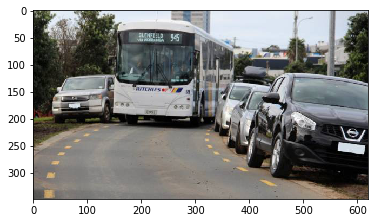

In [5]:
dog_img_path = 'test_images/dog.jpg'
cat_img_path = 'test_images/cat.jpg'
bus_img_path = 'test_images/bus.jpg'
image_detection(bus_img_path)
open_img(bus_img_path)

['snake', 0.7433798]
['raccoon', 0.04939876]
['worm', 0.02915148]


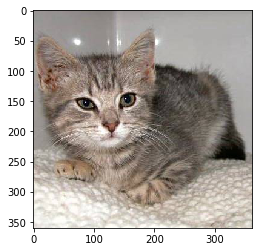

In [6]:
image_detection(cat_img_path)
open_img(cat_img_path)

['whale', 0.19770244]
['skunk', 0.1521749]
['otter', 0.09278537]


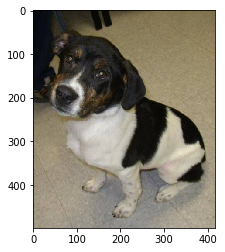

In [7]:
image_detection(dog_img_path)
open_img(dog_img_path)

['tiger', 0.52715427]
['forest', 0.27948347]
['table', 0.040453043]


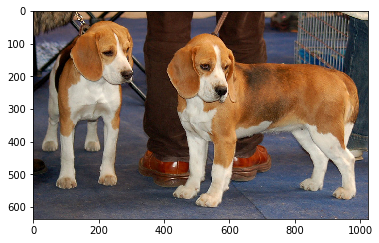

In [8]:
image_detection('test_images/dogs.jpg')
open_img('test_images/dogs.jpg')

['table', 0.32423154]
['streetcar', 0.18834862]
['bed', 0.10527487]


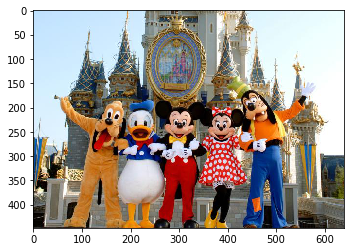

In [9]:
image_detection('test_images/disney.jpg')
open_img('test_images/disney.jpg')

['motorcycle', 0.6168491]
['bicycle', 0.24361597]
['snake', 0.02765019]


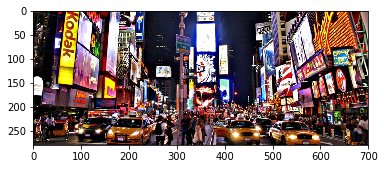

In [10]:
image_detection('test_images/image10.jpg')
open_img('test_images/image10.jpg')

['bicycle', 0.28395265]
['streetcar', 0.25634006]
['television', 0.15813664]


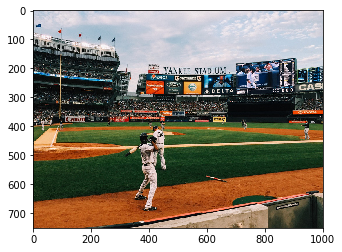

In [11]:
image_detection('test_images/image3.jpg')
open_img('test_images/image3.jpg')

['motorcycle', 0.7213959]
['can', 0.16688655]
['bicycle', 0.02640516]


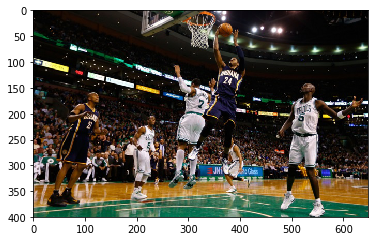

In [12]:
image_detection('test_images/image40.jpg')
open_img('test_images/image40.jpg')

['woman', 0.57982314]
['man', 0.26337817]
['girl', 0.0035531328]


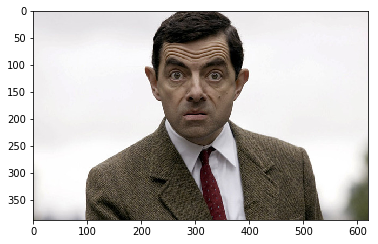

In [14]:
image_detection('test_images/bean.jpg')
open_img('test_images/bean.jpg')